In [9]:
from datetime import datetime, date
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df_AFL259 = pd.read_pickle('../../data/pickled_data/AFL259_all_data.pkl')
df_AEK201 = pd.read_pickle('../../data/pickled_data/AEK201_all_data.pkl')
df_APK309 = pd.read_pickle('../../data/pickled_data/APK309_all_data.pkl')
df_APK310 = pd.read_pickle('../../data/pickled_data/APK310_all_data.pkl')

In [11]:
#min_date = datetime(2006,2,7)
#max_date = datetime(2017,9,28)

In [23]:
def lag_prep_exp(df, min_date, max_date, plots_on=True):
    df = df.loc[(df.date >= min_date) & (df.date <= max_date)].copy()
    
    ## define new columns
    df['prcp_lag_7D'] = df['prcp'].shift(7)
    df['prcp_lag_30D'] = df['prcp'].shift(30)
    df['prcp_lag_45D'] = df['prcp'].shift(45)
    df['prcp_lag_60D'] = df['prcp'].shift(60)
    df['prcp_lag_90D'] = df['prcp'].shift(90)
    df['prcp_lag_180D'] = df['prcp'].shift(180)
    
    ## plots
    if plots_on: 
        y = df.date.values
        X = df.avg_well_depth.values*-1

        for X1 in [df.prcp_lag_7D.values, df.prcp_lag_30D.values, df.prcp_lag_90D.values, df.prcp_lag_180D.values]:
            fig, ax1 = plt.subplots(figsize=(16, 5))
            plt.suptitle('Water Level and Precipitation', fontsize=16)

            ax1 = plt.subplot()
            plt.plot(y, X, 'b-', label = 'Water Level')
            plt.xlabel('Date', fontsize=14)
            plt.ylabel('Depth from Land Surface in feet', fontsize=14)

            ax2 = ax1.twinx()
            ax2.plot(y,X1, 'r--', alpha=0.6, label = 'Precipitation Lag')
            plt.ylabel('Inches', fontsize=14)

            fig.legend()

            fig.tight_layout()
            plt.show()
        
    corr_prcp = df['avg_well_depth'].corr(df['prcp'])
    corr_prcp_lag_7D = df['avg_well_depth'].corr(df['prcp_lag_7D'])
    corr_prcp_lag_30D = df['avg_well_depth'].corr(df['prcp_lag_30D'])
    corr_prcp_lag_45D = df['avg_well_depth'].corr(df['prcp_lag_45D'])
    corr_prcp_lag_60D = df['avg_well_depth'].corr(df['prcp_lag_60D'])
    corr_prcp_lag_90D = df['avg_well_depth'].corr(df['prcp_lag_90D'])
    corr_prcp_lag_180D = df['avg_well_depth'].corr(df['prcp_lag_180D'])
    print('Original Corr: ', corr_prcp)
    print('7D Lag Corr: ', corr_prcp_lag_7D)
    print('30D Lag Corr: ', corr_prcp_lag_30D)
    print('45D Lag Corr: ', corr_prcp_lag_45D)
    print('60D Lag Corr: ', corr_prcp_lag_60D)
    print('90D Lag Corr: ',corr_prcp_lag_90D)
    print('180D Lag Corr: ',corr_prcp_lag_180D)

In [24]:
lag_prep_exp(df_AFL259, datetime(2006,2,7), datetime(2017,6,6), plots_on = False)

Original Corr:  -0.007981892346573113
7D Lag Corr:  -0.0451478143242311
30D Lag Corr:  -0.1108153251120818
45D Lag Corr:  -0.12454384376238885
60D Lag Corr:  -0.11365007459201
90D Lag Corr:  -0.07945501438366882
180D Lag Corr:  -0.09783311441818765


In [25]:
lag_prep_exp(df_AEK201, datetime(2006,2,7),  datetime(2017,6,6), plots_on = False)

Original Corr:  -0.045568947913485564
7D Lag Corr:  -0.09818443385293926
30D Lag Corr:  -0.14515088643061796
45D Lag Corr:  -0.1541991411566582
60D Lag Corr:  -0.14037265666416554
90D Lag Corr:  -0.1147083344320122
180D Lag Corr:  -0.044895726372211356


In [26]:
lag_prep_exp(df_APK309, datetime(2006,6,21), datetime(2014,1,13),plots_on = False)

Original Corr:  -0.035048798634789914
7D Lag Corr:  -0.06075485185107538
30D Lag Corr:  -0.12290118473594462
45D Lag Corr:  -0.1372872191581396
60D Lag Corr:  -0.13702909238217215
90D Lag Corr:  -0.12483223111951186
180D Lag Corr:  -0.06968763889834473


In [27]:
lag_prep_exp(df_APK310, datetime(2006,6,21), datetime(2017,9,28),plots_on = False)

Original Corr:  -0.03789918174160213
7D Lag Corr:  -0.07995151268249126
30D Lag Corr:  -0.15127895100422065
45D Lag Corr:  -0.15912602950629218
60D Lag Corr:  -0.14217006146329175
90D Lag Corr:  -0.10955728058224404
180D Lag Corr:  -0.07034882025609283


## Downsampling (Refer to Intro to Time Series Forecasting Kaggle Notebook)
Link:https://www.kaggle.com/code/iamleonie/intro-to-time-series-forecasting

In [35]:
y = df.date.values
X = df.avg_well_depth.values*-1

resampled_df_week = df[['date','prcp']].resample('7D', on='date').sum().reset_index(drop=False)
resampled_df_month = df[['date','prcp']].resample('M', on='date').sum().reset_index(drop=False)

plt.show()

In [38]:
def plot_water_level_and_precipitation(y, X, X1, y2=None):
    fig, ax1 = plt.subplots(figsize=(16, 5))
    plt.suptitle('Water Level and Precipitation', fontsize=16)

    ax1 = plt.subplot()
    plt.plot(y, X, 'b-', label='Water Level')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Depth from Land Surface in feet', fontsize=14)

    ax2 = ax1.twinx()

    if y2 is not None:
        ax2.plot(y2, X1, 'r--', alpha=0.6, label='Precipitation')
    else:
        ax2.plot(y, X1, 'r--', alpha=0.6, label='Precipitation')

    plt.ylabel('Inches', fontsize=14)

    fig.legend()
    fig.tight_layout()
    plt.show()

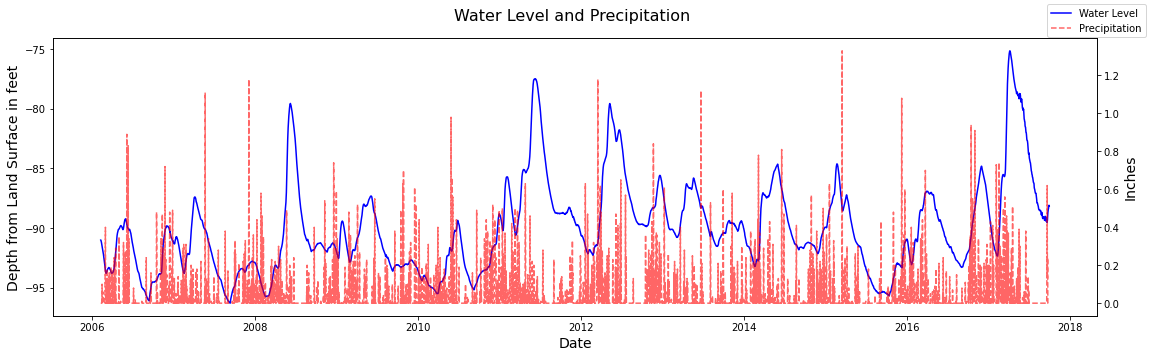

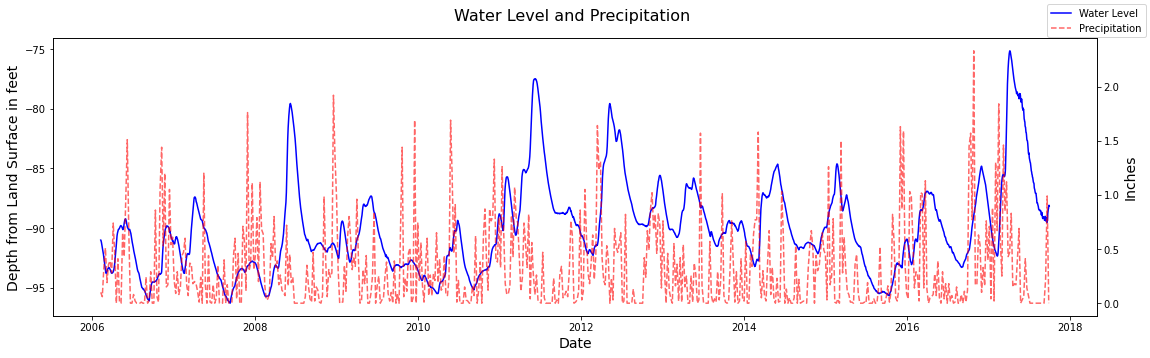

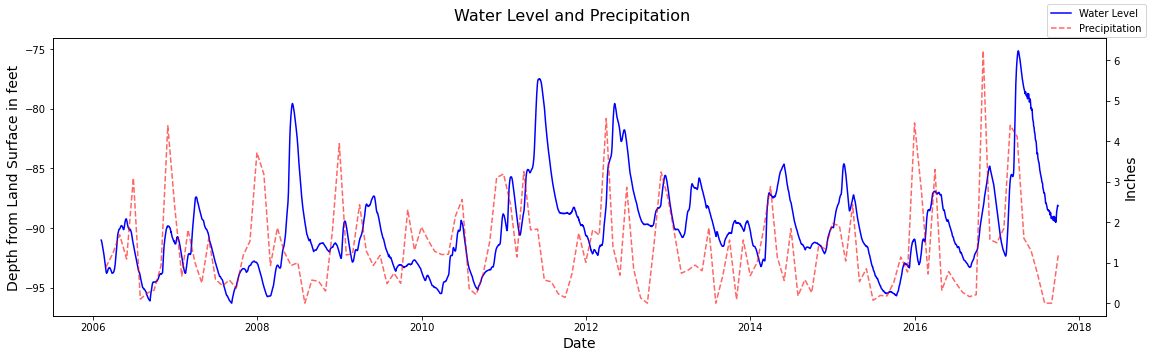

In [39]:
y = df.date.values
X = df.avg_well_depth.values * -1
X1 = df.prcp.values
plot_water_level_and_precipitation(y, X, X1)


y = df.date.values
X = df.avg_well_depth.values * -1
X1 = resampled_df_week.prcp.values
y2 = resampled_df_week.date.values
plot_water_level_and_precipitation(y, X, X1, y2)

y = df.date.values
X = df.avg_well_depth.values * -1
X1 = resampled_df_month.prcp.values
y2 = resampled_df_month.date.values
plot_water_level_and_precipitation(y, X, X1, y2)